<p style="text-align: center;">
<font size="6">確率思考の戦略論－研究ノート</font>
</p>
<p style="text-align: right;">
<font size="4">鈴木涼祐</font>
</p>

<h1>Goal</h1>

<ul>
<li>目的とする数字を達成するためには何をどれくらい積み上げればいいのかを明確化する。</li>
    <ul><li>なお、各指標のつみあがり方は複数あるべき。戦略オプション。</li></ul>
<li>明確化された指標をもとに、それを一定期間で達成するための戦術を策定する。</li>
</ul>

<h1>確率理論の導入</h1>

<h2>二項分布 (Bi-nominal Distribution)</h2>

<h3>概説</h3>

<p>袋の中に赤だまと白だまの二種類が入っており</p>
<ul>
    <li>全部でn個</li>
    <li>赤玉θ個</li>
    <li>白玉 n-θ 個</li>
</ul>
<p>となっており、</p>
<ul>
    <li>中を見ないで玉を一個取り出す：ランダムサンプリング</li>
    <li>取り出した玉は毎回袋に戻す：毎回の試行で特定の玉が選ばれる確率が一定</li>
    <li>これをN回繰り返す</li>
</ul>
<p>N回中r回赤玉が出る確率は下式で表される。（式1）</p>

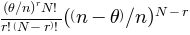

In [31]:
from sympy import *
init_printing()
N = Symbol('N')
r = Symbol('r')
theta = Symbol('theta')
n = Symbol('n')
formula1 = (factorial(N) / (factorial(r) * factorial(N-r))) * (theta/n)**r * ((n - theta)/n)**(N-r)
formula1

<p>また、赤玉の出る平均回数μは次の式で表される。（式2）</p>

In [39]:
formula2 = (N * (theta/n)) 
formula2

<h3>例題</h3>

<ul>
<li>つぼの中に赤玉7個、白玉3個</li>
<li>3回試行し、二回赤玉が出る確率。白玉は一回。</li>
</ul>

In [43]:
formula1.subs([(theta,7), (n,10), (N,3), (r,2)])

In [44]:
formula2.subs([(N,3), (theta,7), (n,10)])

<p>つまり、この場合赤玉2回白玉1回が出る確率は0.441、44%。</p>
<p>また平均値は2.1。つまり、10個中7個赤玉が入っていて3回取り出すような場合、赤玉が取り出される平均回数は2.1回である。</p>

<h3>確率分布表</h3>

<p>この場合の確率分布表を書きたい。今後ともパパっと書けるようにしたい。</p>

<h3>ビジネスへの示唆</h3>

<p>なにかあるかな。現実においてこういった状況が。</p>
<ul>
<li>消費者がその製品に何のこだわりもない</li>
<li>完全にランダムに選んで購入する</li>
    <ul><li>つまり配荷の工夫とか、手に取りやすい位置にあるとかも一切関係ない</li></ul>
<li>自社と競合1社のみのマーケット</li>
<li>自社と他社の陳列してある商品数が分かる（7,3）</li>
</ul>

<p>ときに、自社の製品がどれくらいの確率で選ばれるかを導く。</p>
<p>現実には起こりにくい仮定があるので、もっと一般化する必要がある。</p>

<h2>ポアソン分布（Poisson Distribution）</h2>

<h3>概説</h3>

<p>ポアソン分布は世の中に発生する多くの事象に当てはまる重要な確率分布。</p>
<ul>
<li>平均発生率が長期的に見た場合一定である事象において</li>
<li>その事象の単位期間あたりの分布を導くもの</li>
</ul>
<p>ポアソン分布は二項分布に次の3つの操作を加えたもの</p>
<ul>
<li>白玉の数（n-θ）の数を非常に大きくする。結果としてnが非常に大きくなり、赤玉の出る確率（θ/n）が非常に小さくなる。</li>
<li>玉を取り出す回数Nを非常に大きくする。</li>
<li>赤玉の出る平均回数の式を、μ＝N・（θ/n）と書き換える。</li>
    <ul>
    <li>何か変わった？</li>
    </ul>
</ul>
<p>その結果、二項分布の式は下記ポアソン分布の式になる。</p>
<p>（式3）：Pr（ある一定期間においてr回赤玉の出現する確率）＝</p>

In [14]:
from sympy import *
init_printing()
mu = Symbol('mu')
r = Symbol('r')
formula3 = ((mu**r)/(factorial(r)))*E**(-mu)
formula3

<h3>例題</h3>

<p>軍の馬の例</p>
<ul>
<li>20年間に馬にけられて死亡した兵士の数を</li>
<li>200部隊について調べた</li>
<li>20年間で1部隊あたり12人死亡し、</li>
<li>つまり、1年間で1部隊あたり0.6人死亡している</li>
</ul>
<p>1部隊が1個人と考えて、赤玉が死亡、白玉がセーフの箱から毎日？引くような状況</p>
<p>例えば、1年間に1部隊で2人亡くなる確率を求めるのは次のようになる。</p>
<p>μ＝0.6、ｒ＝2</p>

In [20]:
formula3.subs([(mu,0.6), (r,2)])

<p>1年間に1部隊で1人亡くなる確率は、次のようになる。</p>

In [21]:
formula3.subs([(mu,0.6), (r,1)])

<p>2年間に1部隊で2人亡くなる確率は、次のようになる。</p>

In [19]:
formula3.subs([(mu,1.2), (r,2)])

<h3>確率分布表</h3>

<h3>現実社会への示唆</h3>

<p>ポアソン分布が意味しているところ（対象とできる事象）は、一定期間内において</p>
<ul>
<li>めったに起こりえないこと</li>
<li>試行回数Nが非常に多いこと</li>
<li>独立試行であること。つまり前の試行が後の試行に影響を与えないこと。</li>
<li>長期的に見ると平均発生率が一定であること</li>
</ul>
<p>である事象に対して、一定期間の分布を導くもの。</p>

<p>よく挙げられる例として、事故の回数がある。例えば1年間で起きる事故の回数は大体一定で、かつ</p>
<ul>
<li>めったに起こりえないし</li>
<li>社会全体での車の運転回数Nが非常に多いし</li>
<li>独立試行である、つまり昨日の誰かの運転が明日の誰かの運転に影響を与えない</li>
</ul>
<p>ので、ポアソン分布の好例、らしい。</p>
<p>例えば、東京都で1年間で3回（r）事故が起きる確率は、平均事故回数（μ）が分かれば、ポアソン分布から導かれる。</p>

<p>個人個人の購買行動はポアソン分布している。らしいが、これはいまいちピンとこない。</p>
<ul>
<li>個人が何かを購入する際には、過去の経験も大きく影響する。つまり独立試行とはいえない。また経験以外にも前回大量に買ったから、しばらく買わないとかもありえる。</li>
<li>めったに起こりえない？例えば1日を1回の試行と考えると、確かに、例えばシャンプーを買う日はめったにないかもしれない。</li>
</ul>

<p>消費者全体の購買行動は負の二項分布している。らしい。</p>

<h2>負の二項分布（Negative Bi-nominal Distribution）</h2>

<h3>概説</h3>

<p>個人の消費行動はポアソン分布しているが、消費者全体を見ると負の二項分布している。</p>
<p>NBDのポアソン分布や二項分布と違う点は</p>
<ul>
<li>玉を取り出したときに、出た色と同じ色の玉をd個加えて袋に戻す</li>
</ul>
<p>という影響を考慮したモデルであるということ。</p>
<ul>
<li>その選択自身が次の選択に影響を与える</li>
<li>成功は成功を呼ぶ（ガンマ分布する）</li>
</ul>
<p>ということ。</p>

<p>（式４）：N回中r回赤玉が出る確率</p>
<p>Pr（r回出る（購入される）確率）＝</p>

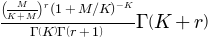

In [23]:
M = Symbol('M')
N = Symbol('N')
theta = Symbol('theta')
n = Symbol('n')
K = Symbol('K')
d = Symbol('d')
r = Symbol('r')
formula4 = ((((1+(M/K))**(-K))*gamma(K+r))/(gamma(r+1)*gamma(K)))*(M/(M+K))**r
formula4

<p>浸透率の計算は購入回数がゼロ回の人（r=0）を全体（100%）から引くと求まるので、次のようになる。</p>
<p>（式５）：浸透率　Penetration rate = </p>

In [27]:
formula5 = 1 - formula4.subs([(r,0)])
formula5

In [24]:
M = N*(theta/n)
K = theta/d


<h3>例題</h3>

<h3>確率分布表</h3>

<h3>現実社会への示唆</h3>

<p>MとKが分かれば、全体の消費者のうち一回でも買う人、浸透率が求まる。</p>
<p>MとKが分かれば、一定期間のうち、r回買う人が何割いるかが求まる。</p>
<p>じゃあMとKをどう求めるか。</p>
<p>M：全体の試行回数（N）と、そのうち購買可能な商品の全体数（n）と自社の商品数（theta）が分かれば求まる。</p>
<p>K：自社の商品数（theta）と、戻す個数（d）（つまり、1回特定ブランドを買ってファンになる度合い）が分かれば求まる。</p>
<p>こう考えると、各要素を全て計測しようとするのは難しそう。計測不能なものもある。例えばdとか。</p>
<p>じゃあ、MとKを直接計測するしかない。</p>

<p>Mは実際の定量調査から擬似的に求めるようだ。</p>
<p>Kは、浸透率を実績から求めてから、浸透率の式からMと合わせて逆算して求める？</p>
<p>で、MとKが分かったら何がうれしい？</p>
<p>実際に欲しいのは需要予測とそれの要因及び寄与率。それらが分かることによって、何にどれくらい力をかけていけばいいか戦術が立てられる。</p>

<h2>ガンマ関数（Gamma function）</h2>

<h3>概要</h3>

<p>階乗 n! の n を正の整数でない部分にも定義できるように一般化した概念としてガンマ関数というものがある。</p>
<p>任意の正の整数 n に対して， Γ(n+1)=n!、Γ(n)=(n-1)!、Γ(1)=1などが成り立つ。らしい。</p>
<p>社会的には、ある選択自身が次の選択に正の影響を与えるという場合に適用できる。らしい。成功は成功を呼ぶということ。数学的にはガンマ分布すること。</p>
<p>イメージ的にはExponentialに近いが、どう違う？分布の右上がり方が違うとか？</p>

<h3>Pythonでの計算例</h3>

In [7]:
gamma(1)

In [10]:
gamma(10)

In [8]:
gamma(50)

<h2>デリシュレーNBDモデル</h2>

<p>その他みたい分布</p>
<ul>
<li>多項分布</li>
<li>ベルヌーイ分布</li>
<li>その他？</li>
</ul>

<h1>市場構造の理論</h1>

<h2>プレファレンス</h2>

<p>主に、ブランドエクイティ、価格、製品パフォーマンスの3つによって決定される。</p>
<p>異なるカテゴリであっても、消費者の購買行動はプレファレンスに基づいて決定されるという点では同じ。</p>
<p>1つ1つのブランドに対する消費者の購買行動も、プレファレンスに基づいて決定されている。</p>
<p>NBDで求められるPrは、消費者のあるブランドへの選択する確率であり、これはプレファレンス（M）に基づいて決まる。</p>
<p>特定のカテゴリが、全消費者の中のどれくらいの消費者から購入してもらえるかを浸透率といい、これもプレファレンスに基づいて決まる。</p>
<p>プレファレンスの向上にこそ経営資源を使うべき。</p>
<ul>
<li>具体的に何をしたらプレファレンスの向上につながるのか？</li>
</ul>

<h2>Evoked set</h2>

<p>消費者の頭の中にある、買ってもよいと思ういくつかのブランドの候補</p>

<h1>需要予測にチャレンジ</h1>

<h2>Key points</h2>

<ul>
<li>需要予測は大きくはずさないことが大事。</li>
<li>具体的には70億円～130億円のように幅をもたせて大きくはずさないことが大事。</li>
<li>そして、上振れ下振れした時に備えておくことが大事。</li>
<li>大きく外れていなければ、認知率、配荷率、店頭プロモーションの強化や調整により、途中から目標を達成することは十分可能。</li>
    <ul>
        <li>認知率、配荷率をそれぞれ10%ずつ改善できれば、1.1x1.1＝1.21で約20%改善できる。</li>
    </ul>
<li>予測値を現実の値より少し少なめに設定できていればベスト。</li>

</ul>


<h2>Case study</h2>

<h3>需要予測例</h3>

<h2>配荷率（量・質）</h2>

<p>配荷率と売上にはどのような関係があるか？</p>
<p>基本的に正の相関だとは思うけど、どの程度？</p>
<p>自分たちのビジネスにおいてどのように求めればいい？</p>

<h2>認知率（量・質）</h2>

<h2>プレファレンス</h2>

<h1>Plantect戦略オプションの考察</h1>

<h2>概説</h2>

<p>売上を伸ばすことを目標とすると、焦点は３つしかない。</p>
<ol>
<li>自社ブランドへのプレファレンスを高める。</li>
<li>認知を高める。</li>
<li>配荷を高める。</li>
</ol>
<p>以下でPlantectに対して、3つの観点から何ができるかを考察し、それぞれのインパクト・確実性・費用も勘案し、最終的に目標に対してどういった戦略・戦術が有効化を導く。</p>

<h2>目標値の設定</h2>

![](Flow chart 1.png)

<h2>認知を伸ばす</h2>

<h3>概説</h3>

<ul>
<li>Aided awareness：Plantectを知っていますか？→自社ブランドの認知の最大面積を測定するのに適している。大きく出がち。但し質問が非常にシンプルなので、いつどこで聞いても均質な結果をとりやすいということから、需要予測には向いている。</li>
<li>Unaided awareness：センサーを使ったスマート農業ソリューションとして思い浮かぶブランドは何ですか？→自社ブランドが消費者のEvoked setに入っているかどうかが分かる。マーケターとして重視している認知の指標。特に真っ先に名前が挙がるかどうか、つまり「第一想起率」がどれくらいかを定期的に増減をモニターして競合と比較する。</li>
</ul>

<h3>現状の把握</h3>

<h3>認知の伸びと売上の伸びの関係</h3>

<ul>
<li>各施策に対する認知率向上への寄与の大きさ、ROI、何か先行研究ある？</li>
<li>Smart agビジネスでの実際のデータ？過去の競合のデータから？</li>
<li>「確率思考の戦略論」には「認知を50%->60%に向上できれば、ほぼ確実に売上は20%伸ばすことができる。」と書いてある。まじで？</li>
</ul>

<h3>伸ばし方考察</h3>

<ul>
<li>量だけでなく質も伸ばすことができる。</li>
    <ul>
    <li>質を伸ばすとは、例えば特定顧客層の中での第一想起率を上げること。富裕層ビジネスでは、マス向けに認知率を高めて（認知の量の拡大）も結局買えないし、最悪の場合プレミア感といったようなブランドイメージを毀損することもありえる。</li>
    </ul>
<li>ROIから優先順位の決定。</li>
</ul>

<h3>まとめ</h3>

<ul>
<li>認知率の目標は何%か？</li>
<li>認知率の質の目標は？</li>
<li>目標達成のための施策は？</li>
<li>分かりやすいように図解</li>
</ul>

<h2>配荷を伸ばす</h2>

<h3>概説</h3>

配荷率とは、
<ul>
<li>市場にいる何％の消費者が、その商品を買おうと思えば物理的に買える状態にあるか、という指標。</li>
<li>店舗数でカウントする「ストアカウント配荷率」</li>
<li>店舗の規模の違いを考慮する「ビジネスウエイト配荷率」</li>
    <ul>
    <li>「ストアカウント配荷率」ｘ「店舗の売上規模 or そのカテゴリの売上規模」によるウエイト</li>
    </ul>
</ul>

<p>配荷率の質を高める主要因の１つとして「取引条件」があげられる。マージンやインセンティブ、独占権など。</p>
<p>マージン一律8%というのがモチベーションをあげないなら、相手の言うことにあわせて「物売りモデル」として「一年目：20%、2年目以降2%」とすれば、まず売ろうとするモチベーションも上がるか？</p>
<p>Justificationとしては、やはり最初に売るのに労力がかかるのだから、そこでしっかり活動費を捻出してもらって、それ以降はむしろあまり手がかからないので、2%のお小遣い程度＋クロスセルの機会の提供となる。</p>
    <ul>
    <li>例：$99k\times1,000set=99mJPY$ as turnover. $99m\times20\%=19.8mJPY$ as activity cost</li>
    </ul>

<h3>現状の把握</h3>

<h3>配荷の伸びと売上の伸びの関係</h3>

<ul>
<li>各施策に対する配荷率向上への寄与の大きさ、ROI、何か先行研究ある？</li>
<li>Smart agビジネスでの実際のデータ？過去の競合のデータから？</li>
<li>「確率思考の戦略論」には「配荷を50%->60%に向上できれば、ほぼ確実に売上は20%伸ばすことができる。」と書いてある。まじで？</li>
</ul>

<h3>伸ばし方考察</h3>

<p>自社ブランドが各販売店にとって「確たる」役割を果たせることが大事。</p>
<ul>
<li>まずは、配荷の量を伸ばすことが最優先。</li>
<li>配荷の質を顧客のプレファレンスに合わせて改善する。</li>
    <ul>
    <li>顧客へのお勧めの仕方が、顧客が求めていることとあっているか→販売店向けTalk script</li>
        <ul>
        <li>販売店が顧客への接触時間が限られているとすると、いかに効率的に顧客のプレファレンスに合わせたTalkにするかが大事。</li>
        <li>要するに、9人しか出れない野球で30人のメンバーがいるとき、打率の高い選手から9人選ぶ、その他は試合に出さない、ということ。</li>
        </ul>
    <li>競合に比べて優先的に扱ってくれているか？→優先的に扱ってもらうためにはどうするか</li>
    <li>最終価格は理想的な価格設定にしてもらえているか？</li>
    </ul>
</ul>

<h3>まとめ</h3>

<ul>
<li>配荷率の目標は何%か？</li>
<li>配荷率の質の目標は？</li>
<li>目標達成のための施策は？</li>
<li>分かりやすいように図解</li>
</ul>

<h2>プレファレンスを伸ばす</h2>

<h3>概説</h3>

「消費者のプレファレンス」とは、「自社ブランドが選ばれる確率」のこと。<br>
下記、負の二項分布に従う。つまり自社ブランドが選ばれる確率はMとKに従う。<br>
<ul>
<li>Mは選ばれる確率そのもの。</li>
<li>Kはその確率密度分布の（バラつきの）形を決めているパラメータ。横軸に「消費者が自社ブランドを選んだ延べ回数」？「年齢や性別などのその他属性」にはならない？</li>
    <ul>
    <li>KはMによって結果的に決まる。つまりKはコントロールすべき対象ではない。</li>
    <li>Plantectビジネスの場合はサブスクリプションなので、一定期間に何回買うかという概念は存在しない。もし、長い期間を考えるのであれば、一年ごとに更新されることを1回とカウントするやり方もあるが。</li>
    <li>そうすると、確率密度分布はどうなるか？0回と1回だけで、合計が100%になるようなイメージか。</li>
    </ul>
</ul>

$Pr$(r回選ばれる確率)$=\frac{(1+\frac{M}{K})^{-K}\times\Gamma(K+r)}{\Gamma(r+1)\times\Gamma(K)}\times(\frac{M}{M+K})^{r}$

つまり、Mが自社ブランドが選ばれる確率そのもので、Mをどう増やすかがつまりプレファレンスをどう増やすかに等しい。

Mの増やし方には2通りある。
<ul>
<li>水平方向への拡大：</li>
<li>垂直方向への拡大：既存のファンに更に好きになってもらって<b>購入回数を増やしてもらう</b>やりかた。くさやを更にくさくさせて、特定の好きな人にはもっと買ってもらうが、もともと嫌いなひとには相変わらず見向きされない。</li>
</ul>

消費者を区切ってターゲティングすることは、Mを増やすためであって、決して自社ブランドのMを狭めるためではない。

![](Mを増やす方向性.JPG)

<b><u>差別化とは</u></b>
<ul>
<li>GrAが富裕層、GrBが大衆層とする。</li>
<li>ベンツはGrA。GrBにも手を伸ばそうとしてGrAからの支持を失っては駄目。</li>
<li>しかし売上拡大したければ、GrBに上手く手を出すしかない。富裕層は取り尽しているとして。（Aクラスの販売。）</li>
<li>トヨタはGrB。GrAに拡大しようとしてレクサスの販売。</li>
</ul>

<ul>
<li>GrAが夢の国層、GrBがスリル層、GrCがファミリー層、とする。</li>
<li>TDRはGrAをがっちり捕まえている。</li>
<li>だが、GrBは捕まえ切れてない。GrCはどうだろうか。</li>
<li>これをGroupの見方を年齢で見てしまうと、TDRは老若男女問わず集めているように見えるので、「映画だけのテーマパーク」というようなずれたコンセプトになって、結果若い女性層のみという偏ったMの構成になっている。</li>
<li>ファミリー層向けのエリアを作ることはTDRとの差別化がなくなる？</li>
    <ul>
    <li>かもしれないし、じゃないかもしれない。</li>
    <li>もっと大事な質問はファミリー層を取る事によって、既存の顧客を失うか？これはNo。つまりMは純増する。ならばやらない理由はない。</li>
    </ul>
<li>TDRは若い女性層は取っていないか？そんなことはない。むしろしっかり取っている。</li>
<li>Targetingはあくまで自社のMを増やすために、それを効率的にやるためにやること。</li>
</ul>

<h3>現状の把握</h3>

<h3>プレファレンスの伸びと売上の伸びの関係</h3>

<h3>伸ばし方考察</h3>

<h3>まとめ</h3>

<h2>戦略オプション</h2>

<ul>
<li>3つくらいにまとめよう。各オプションにそれを表すような名前をつける。</li>
<li>段階別に目標を達成していくように、段階別の戦略を。</li>
</ul>

<h1>Sympy introduction</h1>

<h2>初期設定</h2>

<p>このノートを動かす前に、まず次のFunction達を走らせておくとよい。</p>

In [1]:
from sympy import *
init_printing()

<h2>Basic operation</h2>

<h3>数式表記、代入、数式展開</h3>

<p>次のCodeでまず、</p>
<ul>
    <li>数式表記で式を返す</li>
    <li>.subsで記号に数字を代入して計算する</li>
    <li>数式を展開する</li>
</ul>
<p>ができるようになる。</p>

In [2]:
from sympy import *

# これで数式を印刷できるようになる。
init_printing() 

# 変数を定義
theta = Symbol('theta')
n = Symbol('n')

# 数式を指定し、返す
expr = theta/n
expr

In [3]:
# 数式に数字を代入して計算。シータに10を、nに100を代入している。
expr.subs([(theta,10), (n,100)])

In [4]:
x = Symbol('x')
y = Symbol('y')
expr = (x + y)**5

# expandで式を展開。
expand(expr)

<h3>階乗の表記、計算</h3>

In [6]:
factorial(4)

In [14]:
expr3 = factorial(4)
expr3

In [9]:
expr2 = (factorial(x) + y)
expr2

In [10]:
expr2.subs([(x,4),(y,1)])

<h3>ネイピア数－Napier's constant</h3>

<p>The e constant.

The transcendental number e=2.718281828… is the base of the natural logarithm and of the exponential function, e=exp⁡(1). Sometimes called Euler’s number or Napier’s constant.

Exp1 is a singleton, and can be accessed by S.Exp1, or can be imported as E.</p>

In [9]:
from sympy import *
init_printing()
log(E)

In [10]:
2*S.Exp1

<h2>References</h2>

<li>
<a href="http://docs.sympy.org/latest/index.html">Sympy documentation web link</a>
</li>
<li>
<a href="http://myenigma.hatenablog.com/entry/2015/11/21/222755">Pythonの数式処理ライブラリSymPyをWolfram Alpha(Mathematica, Maxima)の代わりに使う方法</a>
</li>
<li>
<a href="https://rat.cis.k.hosei.ac.jp/article/rat/latex.html">LaTeXの書き方</a>
</li>